## **IRIS.BARUBELAJAR | KAGGLE COMPETITION BY IRIS COMMUNITY**

### **Import Libraries**

In [80]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
import optuna

### **Import Dataset**

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### **Data Understanding**

In [3]:
train.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,jabar,Male,32.0,3.0,150268487.1,2.0,0.0,0.0,6.493161e+07,0
1,15736963,623,Jawa Timur,Male,43.0,1.0,0.0,2.0,1.0,1.0,2.274471e+08,0
2,15721730,601,Jawa Tengah,Female,44.0,4.0,0.0,2.0,1.0,0.0,9.099373e+07,0
3,15762134,506,Jawa Barat,Male,59.0,8.0,185140916.0,2.0,1.0,1.0,2.652056e+08,0
4,15648898,560,Jawa Tengah,Female,27.0,NaN,194221253.6,1.0,1.0,1.0,1.781762e+08,0
5,15659064,790,jateng,Male,37.0,8.0,0.0,2.0,1.0,1.0,2.321693e+08,0
6,15761986,439,Jawa Tengah,Female,32.0,3.0,215828099.7,1.0,1.0,0.0,1.176024e+08,0
7,15713354,597,jabar,Female,22.0,6.0,157757184.8,1.0,1.0,0.0,1.095894e+08,1
8,15593454,678,Jawa Tengah,Female,40.0,4.0,176815734.9,1.0,1.0,NaN,2.582256e+07,0
9,15690134,464,jawabarat,Female,42.0,3.0,133130132.2,1.0,1.0,1.0,2.549892e+08,0


In [4]:
test.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15782993,624,Jawa Timur,Male,51,10,191743610.0,2,1,1,1.986174e+08
1,15640442,717,Jawa Timur,Male,31,4,201565523.7,1,0,0,6.398102e+07
2,15606003,566,Jawa Timur,Female,21,3,0.0,2,1,1,5.634882e+06
3,15672374,672,Jawa Timur,Male,52,8,264163135.8,1,0,0,8.764698e+07
4,15630725,649,Jawa Timur,Female,45,5,144173768.0,1,1,0,2.693794e+08
5,15812338,485,Jawa Tengah,Female,30,7,0.0,1,1,0,1.663634e+08
6,15622470,772,Jawa Tengah,Male,41,10,149216784.1,1,1,1,1.178193e+08
7,15690021,502,Jawa Barat,Female,42,0,205108435.3,1,0,1,4.382546e+07
8,15777855,649,Jawa Timur,Male,45,7,0.0,2,0,1,1.168538e+08
9,15577985,574,Jawa Timur,Female,34,5,174531976.9,2,1,1,2.795855e+07


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7000 non-null   int64  
 1   credit_score      7000 non-null   int64  
 2   country           6845 non-null   object 
 3   gender            7000 non-null   object 
 4   age               6759 non-null   float64
 5   tenure            6712 non-null   float64
 6   balance           6883 non-null   float64
 7   products_number   6852 non-null   float64
 8   credit_card       6841 non-null   float64
 9   active_member     6863 non-null   float64
 10  estimated_salary  6855 non-null   float64
 11  churn             7000 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 656.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       3000 non-null   int64  
 1   credit_score      3000 non-null   int64  
 2   country           3000 non-null   object 
 3   gender            3000 non-null   object 
 4   age               3000 non-null   int64  
 5   tenure            3000 non-null   int64  
 6   balance           3000 non-null   float64
 7   products_number   3000 non-null   int64  
 8   credit_card       3000 non-null   int64  
 9   active_member     3000 non-null   int64  
 10  estimated_salary  3000 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 257.9+ KB


#### Variabel Target

In [7]:
train['churn'].value_counts()

0    5590
1    1410
Name: churn, dtype: int64

### **Data Preprocessing**

#### Drop Irrelevant Feature

In [8]:
train= train.drop(['customer_id'], axis=1)
test = test.drop(['customer_id'], axis=1)

#### Split Dataset

In [9]:
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
categorical_features = ['country', 'gender']

#### Handling Inconsistency Data

In [10]:
change_country = {
    'jawatimur': 'Jawa Timur',
    'jatim': 'Jawa Timur',
    'Jawa Timur': 'Jawa Timur',
    'jawabarat': 'Jawa Barat',
    'jabar': 'Jawa Barat',
    'Jawa Barat': 'Jawa Barat',
    'jawatengah': 'Jawa Tengah',
    'jateng': 'Jawa Tengah',
    'Jawa Tengah': 'Jawa Tengah',
}

train['country'] = train['country'].map(change_country)

print(train.head())

   credit_score      country  gender   age  tenure      balance  \
0           596   Jawa Barat    Male  32.0     3.0  150268487.1   
1           623   Jawa Timur    Male  43.0     1.0          0.0   
2           601  Jawa Tengah  Female  44.0     4.0          0.0   
3           506   Jawa Barat    Male  59.0     8.0  185140916.0   
4           560  Jawa Tengah  Female  27.0     NaN  194221253.6   

   products_number  credit_card  active_member  estimated_salary  churn  
0              2.0          0.0            0.0      6.493161e+07      0  
1              2.0          1.0            1.0      2.274471e+08      0  
2              2.0          1.0            0.0      9.099373e+07      0  
3              2.0          1.0            1.0      2.652056e+08      0  
4              1.0          1.0            1.0      1.781762e+08      0  


In [11]:
train['country'].value_counts()

Jawa Timur     3424
Jawa Barat     1749
Jawa Tengah    1672
Name: country, dtype: int64

In [12]:
test['country'].value_counts()

Jawa Timur     1507
Jawa Tengah     762
Jawa Barat      731
Name: country, dtype: int64

#### Check Outliers

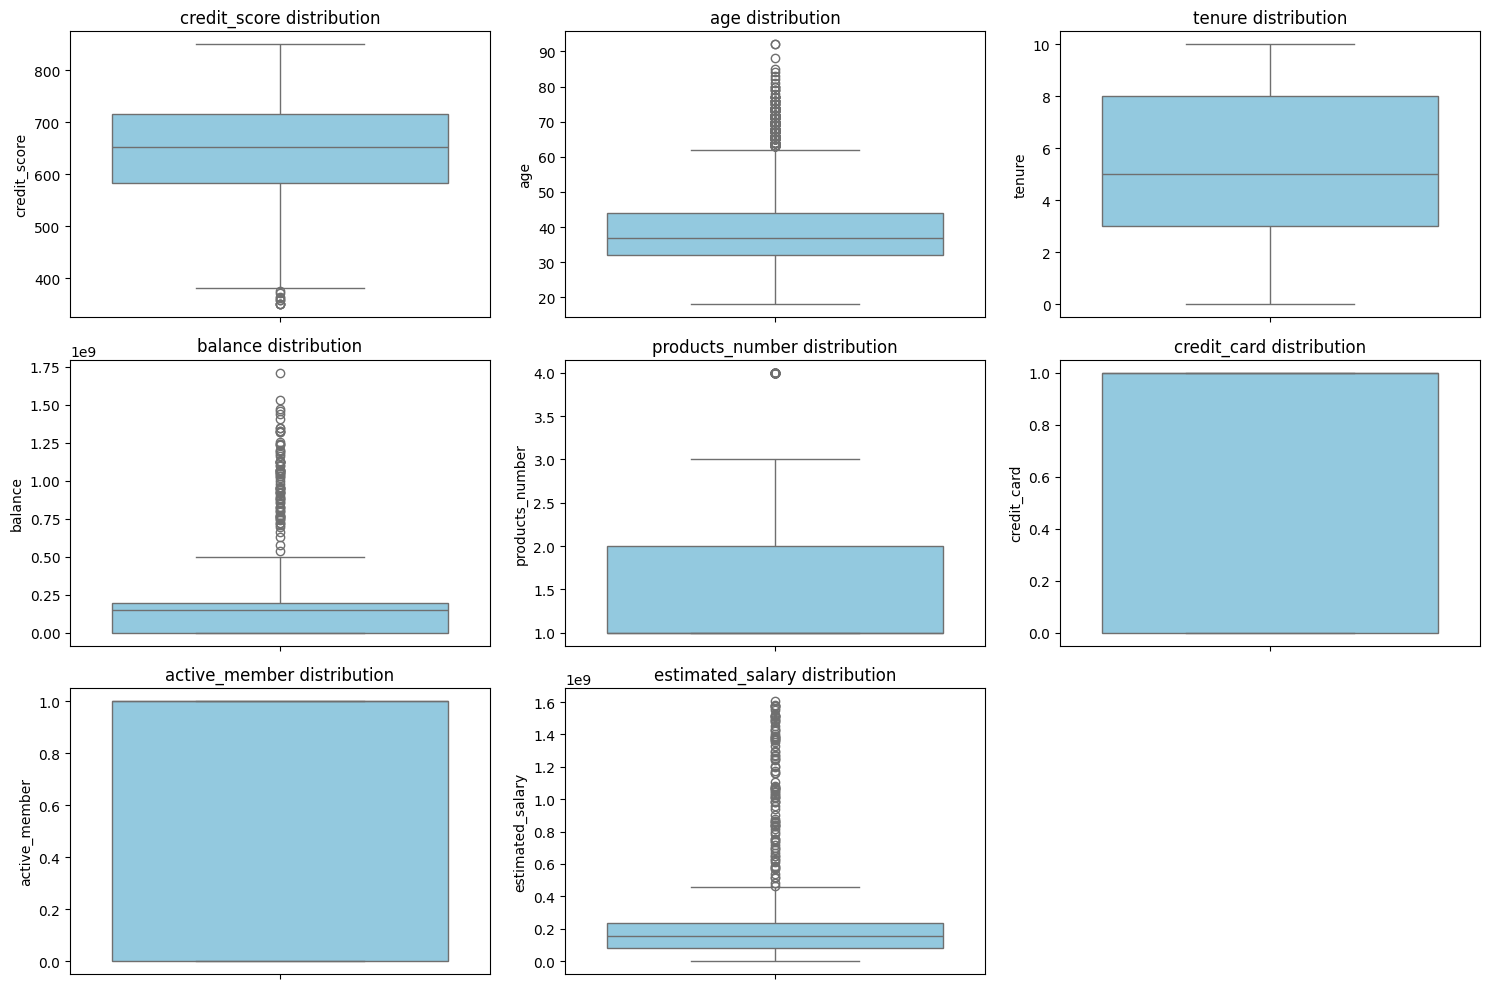

In [13]:
#Training Data
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train[column], color="skyblue")
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

Interpretasi:

credit_score (skor kredit): Sebagian skor kredit berada di atas 600, kemudian terdapat beberapa outlier dengan skor kredit yang sangat tinggi.

age (usia): Distribusi usia cenderung terpusat di sekitar umur 40 tahun, kemudian terdapat outlier dengan umur yang lebih tua.

tenure (masa kerja): Sebagian besar pelanggan memiliki masa kerja kurang dari 10 tahun, kemudian terdapat beberapa outlier dengan masa kerja yang sangat lama. 

balance (saldo): Sebagian besar saldo kurang dari 500.000, kemudian terdapat beberapa outlier dengan saldo yang sangat tinggi.

products number (jumlah produk): Distribusi jumlah produk terpusat di sekitar 2, kemudian terdapat beberapa outlier yang memiliki lebih banyak produk.

estimated salary (perkiraan gaji): Distribusi gaji terpusat di sekitar 80.000, kemudian terdapat beberapa outlier yang memiliki gaji yang sangat tinggi.

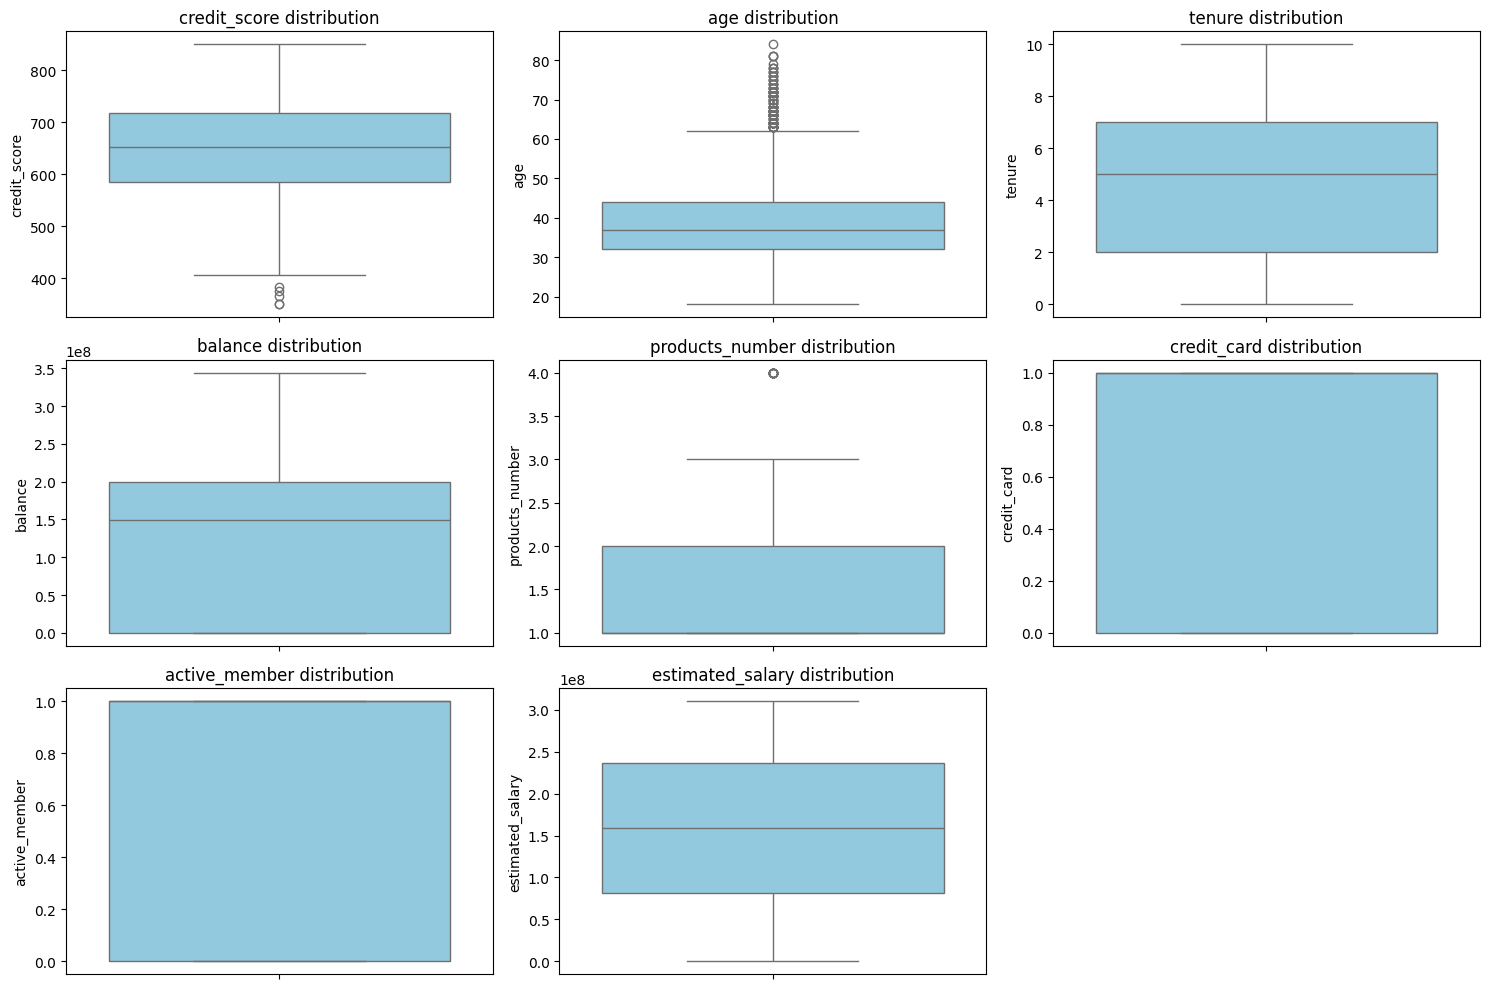

In [14]:
#Testing Data 
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=test[column], color="skyblue")
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

Interpretasi:

credit_score (skor kredit): Sebagian skor kredit berada di atas 600, kemudian terdapat beberapa outlier dengan skor kredit dibawah 400.

age (usia): Distribusi usia cenderung terpusat di sekitar umur 40 tahun, kemudian terdapat outlier dengan umur yang lebih tua.

tenure (masa kerja): Sebagian besar pelanggan memiliki masa kerja kurang dari 10 tahun, kemudian tidak ditemukan outlier, menunjukkan bahwa tidak ada pelanggan dengan masa kerja yang sangat jauh dibandingkan mayoritas.

balance (saldo): Distribusi saldo cenderung terpusat di 1.500.000, kemudian tidak ditemukan outlier, menunjukkan bahwa tidak ada pelanggan dengan saldo yang sangat jauh dibandingkan mayoritas.

products number (jumlah produk): Distribusi jumlah produk terpusat di sekitar 2, kemudian terdapat beberapa outlier yang memiliki lebih banyak produk.

estimated salary (perkiraan gaji): Distribusi gaji terpusat di sekitar 1.500.000, kemudian tidak ditemukan outlier, menunjukkan tidak ada pelanggan dengan estimasi gaji yang sangat jauh dibandingkan mayoritas.

#### Check Distribution Data

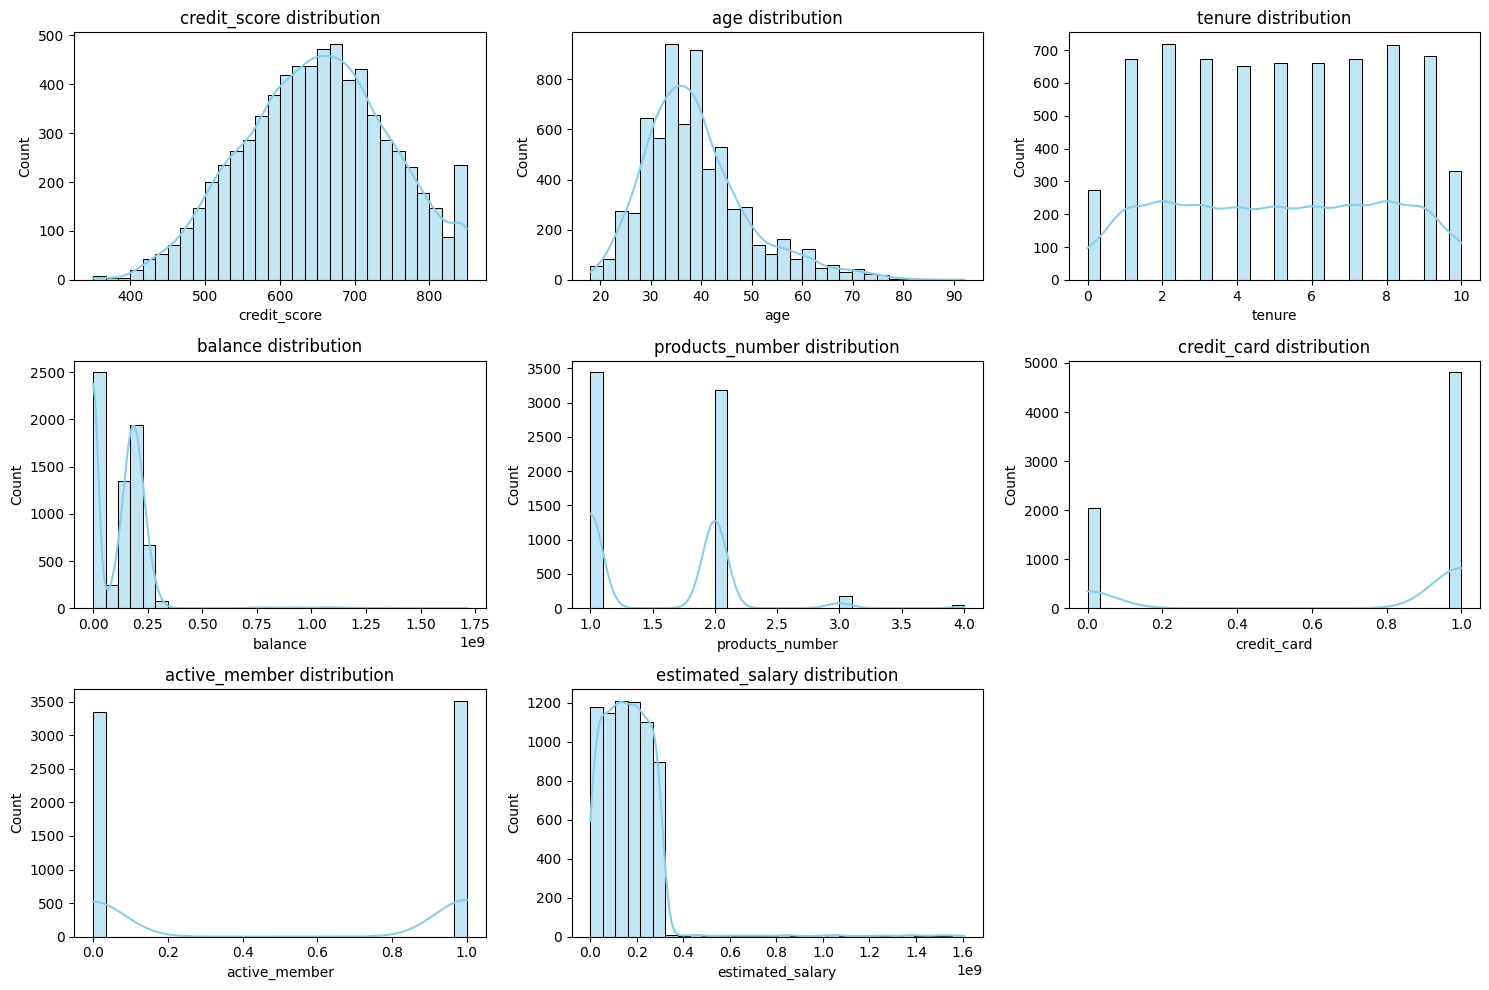

In [15]:
# Training Data | Numerical Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[column], kde=True, bins=30, color='skyblue') 
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

Interpretasi:

credit_score (skor kredit): Distribusi untuk skor kredit yaitu miring ke kanan, dengan mayoritas skor kredit berada di atas 600

age (usia): Distribusi untuk usia terpusat berada di sekitar umur 40 tahun, dengan modusnya sekitar umur 35 tahun.

tenure (masa kerja): Distribusi untuk masa kerja terpusat berada di sekitar masa kerja 5 tahun, dengan modusnya sekitar masa kerja 8 tahun

balance (saldo): distribusi untuk balance yaitu miring ke kanan, dengan mayoritas saldo berada di bawah 200.000.000. 

products number (jumlah produk): Distribusi untuk jumlah produk terpusat di sekitar 2, dengan modusnya adalah jumlah produk 1.

estimated salary (perkiraan gaji): Distribusi untuk gaji yaitu miring ke kanan, dengan mayoritas gaji berada di bawah 200.000.000

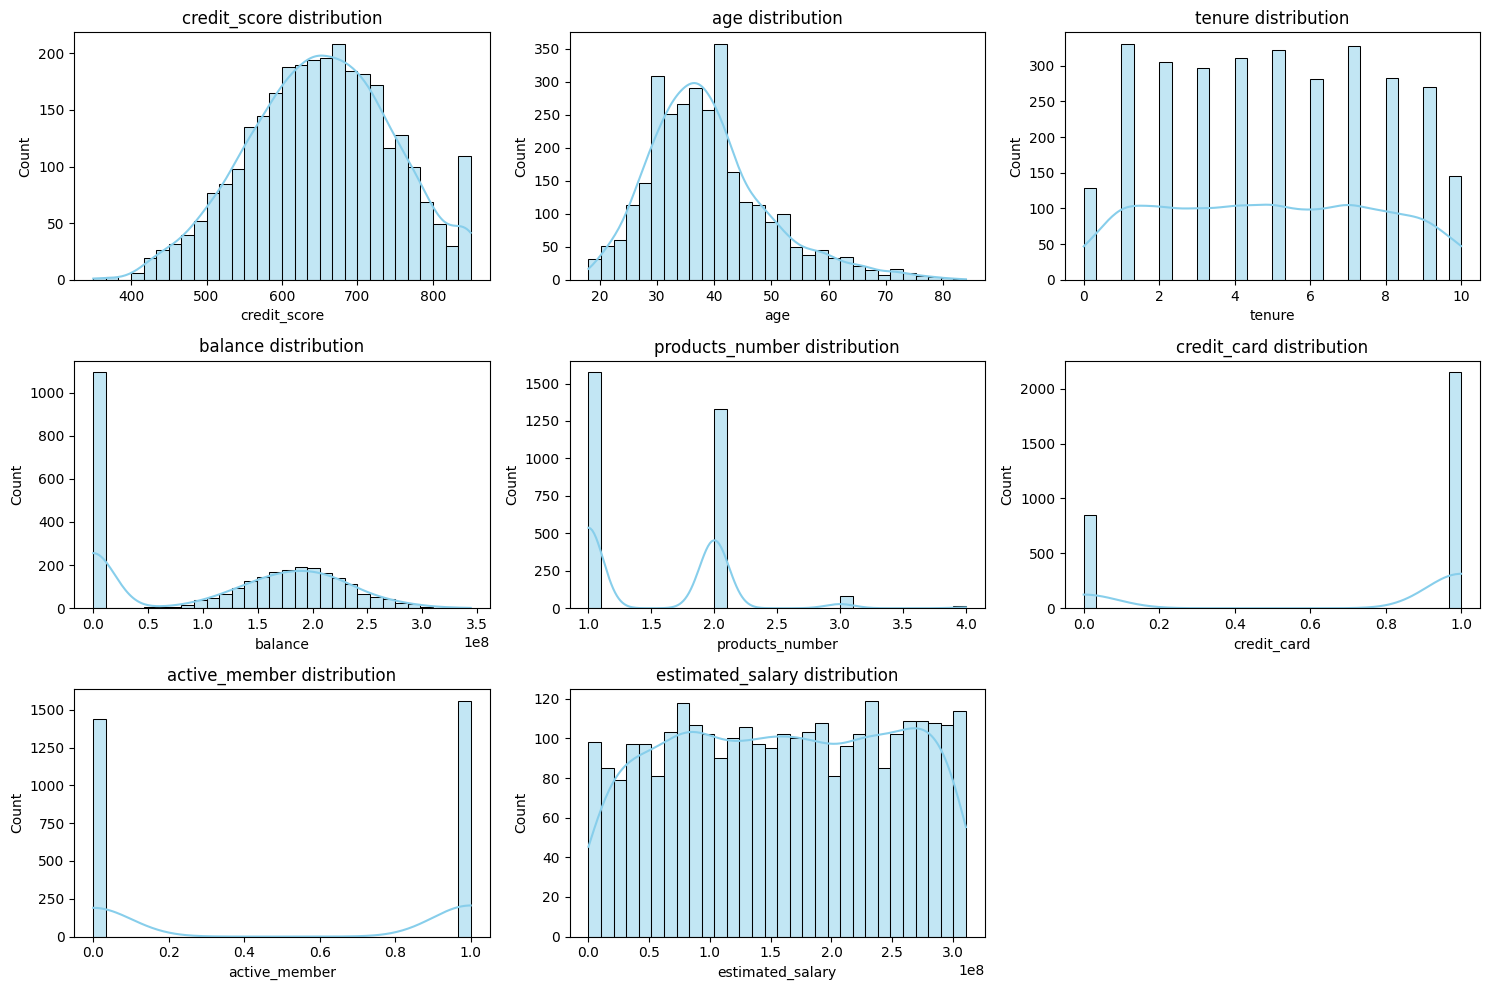

In [16]:
# Testing Data | Numerical Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(test[column], kde=True, bins=30, color='skyblue') 
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

**Interpretasi:**

credit_score (skor kredit): Distribusi untuk skor kredit berdistribusi normal dengan sedikit kemiringan ke kiri.

age (usia): Distribusi untuk usia yaitu miring ke kanan, dengan mayoritas orang berusia antara 30 sampai 50 tahun. 

tenure (masa kerja): Distribusi untuk masa kerja terpusat berada di sekitar masa kerja 5 tahun, dengan modusnya sekitar masa kerja 8 tahun

balance (saldo): distribusi untuk balance yaitu miring ke kanan, dengan mayoritas pelanggan memiliki saldo antara 0 sampai 10.000.000

products number (jumlah produk): Distribusi untuk jumlah produk terpusat di sekitar 2, dengan modusnya adalah jumlah produk 1.

estimated salary (perkiraan gaji): Distribusi untuk gaji yaitu miring ke kanan, dengan mayoritas gaji berada di bawah 200.000.000

#### EDA Categorical Features

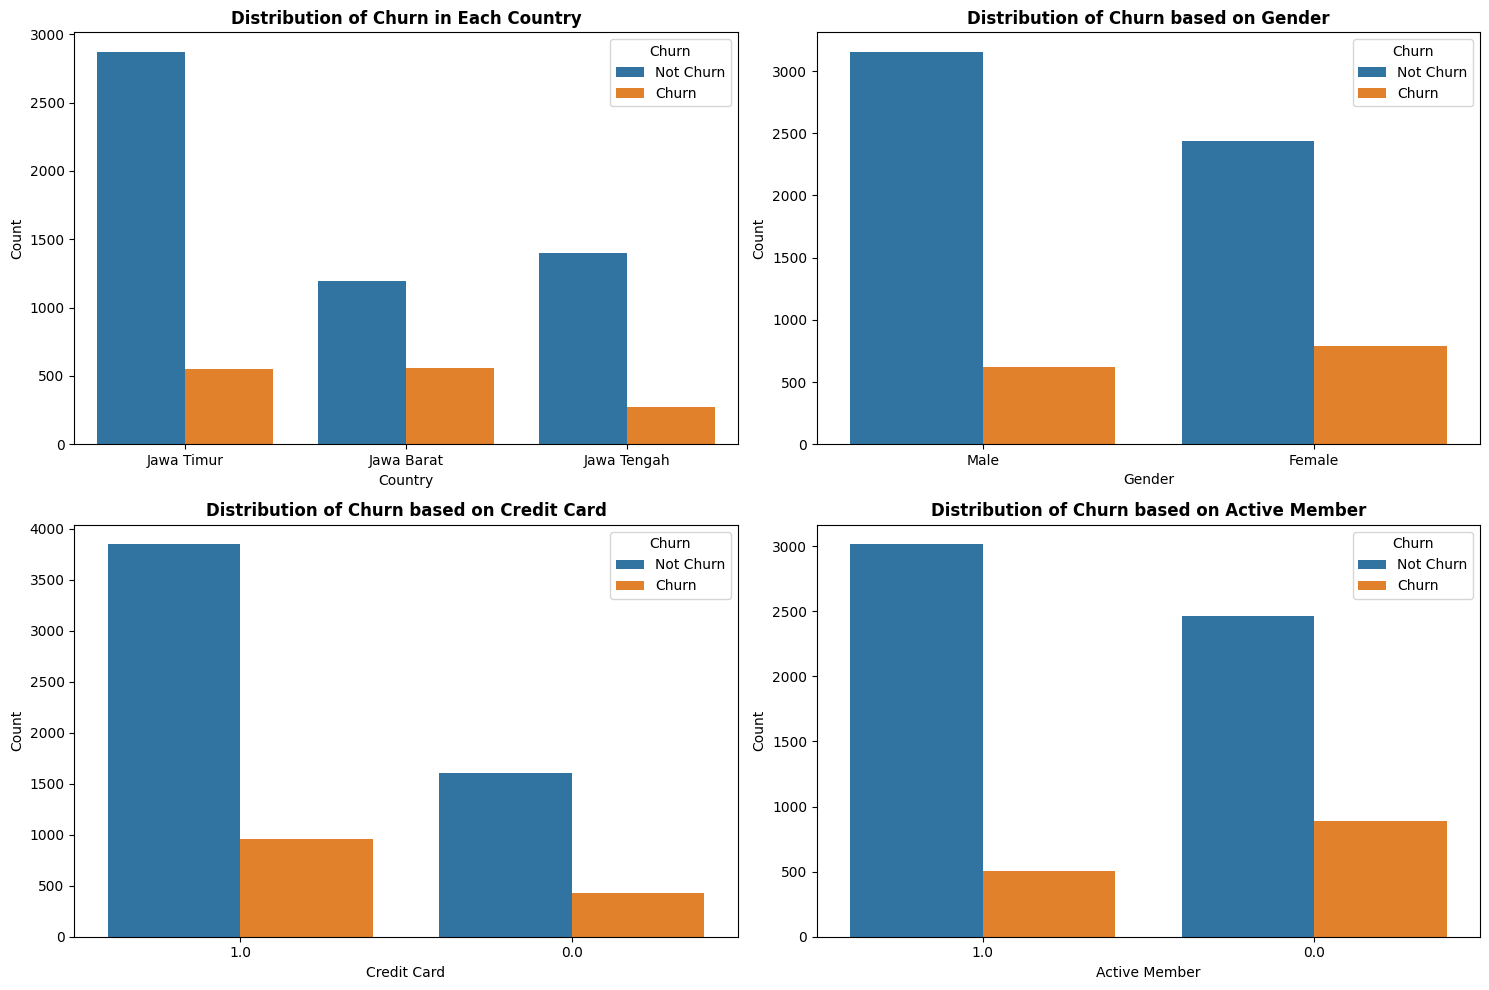

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

plot_columns = [('country', 'Distribution of Churn in Each Country', 'Country'),
                ('gender', 'Distribution of Churn based on Gender', 'Gender'),
                ('credit_card', 'Distribution of Churn based on Credit Card', 'Credit Card'),
                ('active_member', 'Distribution of Churn based on Active Member', 'Active Member')]

for i, (column, title, xlabel) in enumerate(plot_columns):
    sns.countplot(data=train, x=column, hue='churn', order=train[column].value_counts().index, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(title, fontweight='bold')
    axes[i//2, i%2].set_xlabel(xlabel)
    axes[i//2, i%2].set_ylabel("Count")
    axes[i//2, i%2].legend(title="Churn", loc='upper right', labels=['Not Churn', 'Churn'])
    axes[i//2, i%2].tick_params(axis='x')

plt.tight_layout()
plt.show()


### Interpretasi Bar Chart 

Interpretasi Bar Chart ini memberikan gambaran yang jelas tentang distribusi churn di berbagai kategori, seperti berikut:

**Distribution of Churn Across Regions (Jawa Timur, Jawa Barat, Jawa Tengah)**
Pada Bar Chart ini, terlihat bahwa jumlah pelanggan yang tidak melakukan churn jauh lebih tinggi dibandingkan yang melakukan churn di semua tiga daerah, yakni Jawa Timur, Jawa Barat, dan Jawa Tengah. Meskipun Jawa Timur memiliki jumlah pelanggan yang churn tertinggi (554 nasabah), namun jumlah pelanggan yang tidak churn (2870 nasabah) jauh lebih dominan. Hal serupa terlihat di Jawa Barat dan Jawa Tengah. Data ini memberikan pemahaman yang baik tentang sebaran churn di setiap daerah.

**Distribution of Churn Based on Gender**
Bar Chart ini menggambarkan perbandingan churn dan tidak churn berdasarkan jenis kelamin nasabah. Meskipun pada kedua jenis kelamin jumlah pelanggan yang tidak churn lebih tinggi, tetapi terlihat bahwa pada jenis kelamin Female, proporsi pelanggan yang churn (790 nasabah) relatif lebih tinggi dibandingkan dengan jenis kelamin Male (620 nasabah). Hal ini dapat menjadi fokus analisis lebih lanjut terkait dengan faktor-faktor yang mempengaruhi churn pada setiap jenis kelamin.

**Distribution of Churn Based on Credit Card Ownership**
Grafik ini memberikan wawasan tentang seberapa besar pengaruh kepemilikan kartu kredit terhadap kecenderungan churn. Terlihat bahwa pelanggan yang memiliki kartu kredit memiliki jumlah churn yang lebih rendah dibandingkan dengan mereka yang tidak memiliki. Analisis lebih mendalam dapat dilakukan untuk memahami apakah kepemilikan kartu kredit memiliki dampak langsung terhadap retensi pelanggan.

**Distribution of Churn Based on Active Member Status**
Bar Chart terakhir ini memberikan informasi tentang sebaran churn berdasarkan status keaktifan nasabah di Bank Jago. Jumlah nasabah yang tidak churn lebih tinggi pada nasabah yang terdaftar sebagai anggota aktif di Bank Jago. Namun, jumlah nasabah yang churn pada kedua kategori (aktif dan tidak aktif) tetap perlu menjadi perhatian untuk meningkatkan strategi retensi dan pelayanan kepada nasabah.

In [18]:
print(pd.crosstab(train.churn, train.country))
print(pd.crosstab(train.churn, train.country, normalize="index"))

country  Jawa Barat  Jawa Tengah  Jawa Timur
churn                                       
0              1191         1400        2870
1               558          272         554
country  Jawa Barat  Jawa Tengah  Jawa Timur
churn                                       
0          0.218092     0.256363    0.525545
1          0.403179     0.196532    0.400289


In [19]:
print(pd.crosstab(train.churn, train.gender))
print(pd.crosstab(train.churn, train.gender, normalize="index"))

gender  Female  Male
churn               
0         2436  3154
1          790   620
gender    Female      Male
churn                     
0       0.435778  0.564222
1       0.560284  0.439716


#### Check Correlation (Heatmap)

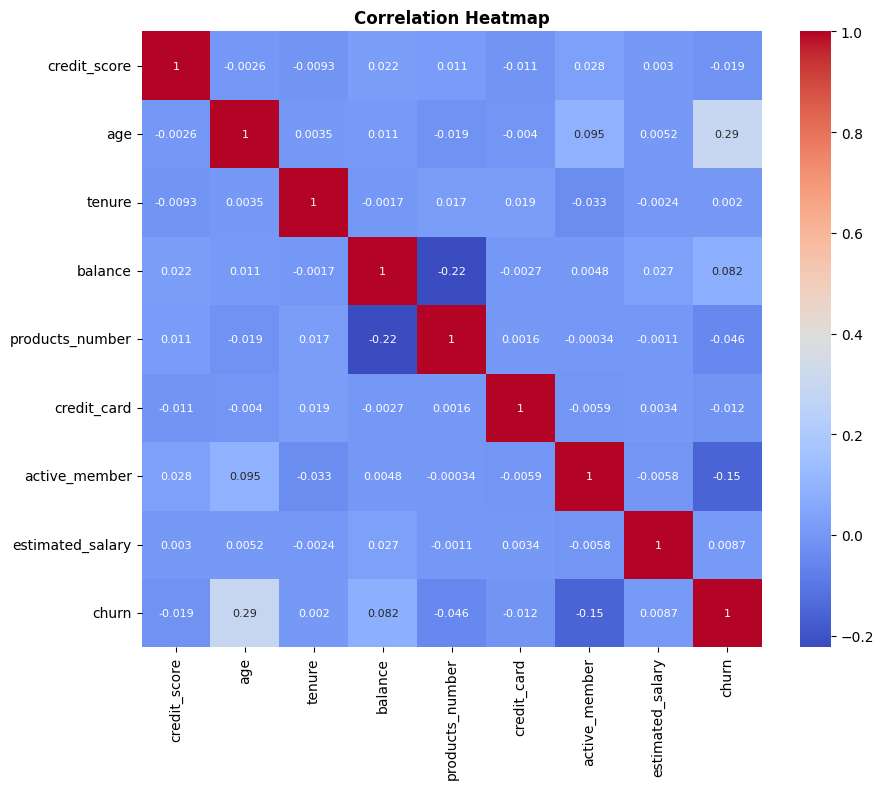

In [20]:
numeric_features_with_churn = numeric_features + ['churn']

plt.figure(figsize=(10, 8))
correlation = train[numeric_features_with_churn].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap', fontsize=12, fontweight='bold')
plt.show()


#### Interpretasi Heatmap Correlation
Heatmap korelasi ini memberikan wawasan yang berharga tentang hubungan antar variabel dalam dataset. Korelasi positif tertinggi yang mencapai 0.29 antara variabel churn dan age menunjukkan adanya kecenderungan bahwa semakin tua usia nasabah, semakin besar kemungkinan mereka akan melakukan churn. Meskipun nilainya tidak sangat tinggi, namun tetap memberikan indikasi yang patut diperhatikan.

Di sisi lain, korelasi negatif yang paling rendah terdapat antara products_number dan balance dengan nilai -0.22. Artinya, semakin tinggi jumlah produk yang dimiliki oleh nasabah, semakin rendah saldo yang mereka miliki. Hubungan ini dapat diinterpretasikan sebagai adanya kecenderungan nasabah dengan banyak produk cenderung memiliki saldo yang lebih rendah.

### **Splitting Data**

In [47]:
X = train.drop(['churn'], axis=1)
y = train['churn']

fold = KFold(n_splits=5, shuffle=True, random_state=3)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5600, 10), (5600,), (1400, 10), (1400,))

### **Preprocessor**

In [55]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', StandardScaler())]),
                                 ['credit_score', 'age', 'tenure', 'balance',
                                  'products_number', 'credit_card',
                                  'active_member', 'estimated_salary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['country', 'gender'])])

### **Modelling**

#### CatBoost Classifier

In [56]:
model_catboost = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('catboost', CatBoostClassifier())])

model_catboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'credit_card',
                                                   'active_member',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'gender'])])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x000002CDB4A34E90>)])

In [57]:
param_grid_catboost = {
    'catboost__iterations': [100, 200, 300],
    'catboost__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'catboost__depth': [3, 4, 5, 10],
    'catboost__l2_leaf_reg': [1, 3, 5]  
}

tuning_catboost = GridSearchCV(model_catboost, param_grid=param_grid_catboost, cv=5, scoring="f1", n_jobs=-1)
tuning_catboost.fit(X_train, y_train)

0:	learn: 0.5906216	total: 137ms	remaining: 27.2s
1:	learn: 0.5064216	total: 145ms	remaining: 14.3s
2:	learn: 0.4561481	total: 149ms	remaining: 9.76s
3:	learn: 0.4292525	total: 152ms	remaining: 7.45s
4:	learn: 0.4097723	total: 159ms	remaining: 6.18s
5:	learn: 0.3958263	total: 162ms	remaining: 5.22s
6:	learn: 0.3867606	total: 165ms	remaining: 4.54s
7:	learn: 0.3815939	total: 168ms	remaining: 4.03s
8:	learn: 0.3752447	total: 174ms	remaining: 3.68s
9:	learn: 0.3703993	total: 177ms	remaining: 3.35s
10:	learn: 0.3670231	total: 180ms	remaining: 3.09s
11:	learn: 0.3629490	total: 183ms	remaining: 2.86s
12:	learn: 0.3601879	total: 186ms	remaining: 2.67s
13:	learn: 0.3584761	total: 190ms	remaining: 2.52s
14:	learn: 0.3551178	total: 194ms	remaining: 2.4s
15:	learn: 0.3538152	total: 197ms	remaining: 2.27s
16:	learn: 0.3499240	total: 200ms	remaining: 2.16s
17:	learn: 0.3491819	total: 204ms	remaining: 2.06s
18:	learn: 0.3482939	total: 208ms	remaining: 1.98s
19:	learn: 0.3472499	total: 211ms	remainin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'credit_card',
                                                                          'active_member',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(st...ost_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x000002CDB4A34E90>)]),
             n_jobs=-1,
             param_grid={'catboost__depth': [3, 4, 5, 10],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__l2_leaf_reg': [1, 3, 5],
                         'catboost__learning_rate': [0.001, 0.01, 0.1, 0.2]},
             scoring='f1')

In [58]:
# Predictions on training set
y_train_pred = tuning_catboost.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_catboost.predict(X_test)

# F1 score on training set
f1_train_catboost = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_catboost = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_catboost)
print("F1 Score on Testing Set:", f1_test_catboost)

# Print other relevant information
print("Best Parameters:", tuning_catboost.best_params_)
print("Accuracy on Training Set:", tuning_catboost.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_catboost.best_score_)
print("Accuracy on Testing Set:", tuning_catboost.score(X_test, y_test))


F1 Score on Training Set: 0.657504123144585
F1 Score on Testing Set: 0.5909090909090909
Best Parameters: {'catboost__depth': 3, 'catboost__iterations': 200, 'catboost__l2_leaf_reg': 5, 'catboost__learning_rate': 0.2}
Accuracy on Training Set: 0.657504123144585
Best Cross-Validated Score: 0.5721395255201674
Accuracy on Testing Set: 0.5909090909090909


#### XGBoost Classifier

In [59]:
model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                             ('xgb', XGBClassifier())])

In [60]:
param_grid_xgb = {
    'xgb__learning_rate': [0.1, 0.2, 0.3],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__min_child_weight': [1, 3, 5]
}

tuning_xgb = GridSearchCV(model_xgb, param_grid=param_grid_xgb, cv=5, scoring="f1", n_jobs=-1)
tuning_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'credit_card',
                                                                          'active_member',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(st...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.1, 0.2, 0.3],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__min_child_weight': [1, 3, 5],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='f1')

In [82]:
# Predictions on training set
y_train_pred = tuning_xgb.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_xgb.predict(X_test)

# F1 score on training set
f1_train_xgb = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_xgb = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_xgb)
print("F1 Score on Testing Set:", f1_test_xgb)

# Print other relevant information
print("Best Parameters:", tuning_xgb.best_params_)
print("Accuracy on Training Set:", tuning_xgb.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_xgb.best_score_)
print("Accuracy on Testing Set:", tuning_xgb.score(X_test, y_test))


F1 Score on Training Set: 0.6991247264770241
F1 Score on Testing Set: 0.5918367346938777
Best Parameters: {'xgb__subsample': 1.0, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 3, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.8}
Accuracy on Training Set: 0.6991247264770241
Best Cross-Validated Score: 0.5675736823483832
Accuracy on Testing Set: 0.5918367346938777


#### LightGBM

In [62]:
model_lgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('lgb', LGBMClassifier())])

In [63]:
param_grid_lgb = {
    'lgb__n_estimators': [100, 200, 300],
    'lgb__learning_rate': [0.01, 0.1, 0.2],
    'lgb__max_depth': [3, 4, 5],
}

tuning_lgb = GridSearchCV(model_lgb, param_grid=param_grid_lgb, cv=5, scoring="f1", n_jobs=-1)
tuning_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1108, number of negative: 4492
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1115
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.197857 -> initscore=-1.399741
[LightGBM] [Info] Start training from score -1.399741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=0)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['credit_score',
                                                                          'age',
                                                                          'tenure',
                                                                          'balance',
                                                                          'products_number',
                                                                          'credit_card',
                                                                          'active_member',
                                                                          'estimated_salary']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'gender'])])),
                                       ('lgb', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgb__learning_rate': [0.01, 0.1, 0.2],
                         'lgb__max_depth': [3, 4, 5],
                         'lgb__n_estimators': [100, 200, 300]},
             scoring='f1')

In [64]:
# Predictions on training set
y_train_pred = tuning_lgb.predict(X_train)
# Predictions on testing set
y_test_pred = tuning_lgb.predict(X_test)

# F1 score on training set
f1_train_lgb = f1_score(y_train, y_train_pred, average='binary') 

# F1 score on testing set
f1_test_lgb = f1_score(y_test, y_test_pred, average='binary')  

# Print the F1 scores
print("F1 Score on Training Set:", f1_train_lgb)
print("F1 Score on Testing Set:", f1_test_lgb)

# Print other relevant information
print("Best Parameters:", tuning_lgb.best_params_)
print("Accuracy on Training Set:", tuning_lgb.score(X_train, y_train))
print("Best Cross-Validated Score:", tuning_lgb.best_score_)
print("Accuracy on Testing Set:", tuning_lgb.score(X_test, y_test))


F1 Score on Training Set: 0.6501965188096576
F1 Score on Testing Set: 0.6008230452674898
Best Parameters: {'lgb__learning_rate': 0.2, 'lgb__max_depth': 3, 'lgb__n_estimators': 100}
Accuracy on Training Set: 0.6501965188096576
Best Cross-Validated Score: 0.5651104843542197
Accuracy on Testing Set: 0.6008230452674898


### **Evaluation**

In [66]:
results = {
    'Model': ['CatBoost', 'XGBoost', 'LightGBM'],
    'F1 Score (Train)': [ f1_train_catboost, f1_train_xgb, f1_train_lgb],
    'F1 Score (Test)': [f1_test_catboost, f1_test_xgb, f1_test_lgb]
}

df_results = pd.DataFrame(results)

print(df_results)

      Model  F1 Score (Train)  F1 Score (Test)
0  CatBoost          0.657504         0.590909
1   XGBoost          0.677560         0.611336
2  LightGBM          0.650197         0.600823


Dari hasil evaluasi diatas, model yang terbaik adalah XGBoost sehingga kami menggunakan model XGBoost sebagai final model nya.

In [83]:
# Predict on the validation set using the best model

y_pred = tuning_xgb.predict(test)

pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['customer_id'],pred],axis=1)
datasets.columns=['customer_id','churn']
datasets.to_csv('xgb_final.csv',index=False)

### Ensemble Model

In [78]:
from sklearn.ensemble import VotingClassifier

# Use the best-tuned parameters for each model
best_catboost = tuning_catboost.best_estimator_
best_xgb = tuning_xgb.best_estimator_
best_lgb = tuning_lgb.best_estimator_

# Create a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('catboost', best_catboost),
    ('xgb', best_xgb),
    ('lgb', best_lgb)
], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_f1_score = f1_score(y_test, ensemble_predictions)

print("Ensemble Model F1 Score:", ensemble_f1_score)

0:	learn: 0.5906216	total: 13.8ms	remaining: 2.74s
1:	learn: 0.5064216	total: 21.7ms	remaining: 2.15s
2:	learn: 0.4561481	total: 24.1ms	remaining: 1.58s
3:	learn: 0.4292525	total: 26.3ms	remaining: 1.29s
4:	learn: 0.4097723	total: 28.3ms	remaining: 1.1s
5:	learn: 0.3958263	total: 30.2ms	remaining: 978ms
6:	learn: 0.3867606	total: 35ms	remaining: 964ms
7:	learn: 0.3815939	total: 37.1ms	remaining: 892ms
8:	learn: 0.3752447	total: 39.3ms	remaining: 834ms
9:	learn: 0.3703993	total: 41.3ms	remaining: 785ms
10:	learn: 0.3670231	total: 43.7ms	remaining: 751ms
11:	learn: 0.3629490	total: 46.2ms	remaining: 724ms
12:	learn: 0.3601879	total: 50.2ms	remaining: 723ms
13:	learn: 0.3584761	total: 52.4ms	remaining: 696ms
14:	learn: 0.3551178	total: 54.9ms	remaining: 677ms
15:	learn: 0.3538152	total: 57.3ms	remaining: 659ms
16:	learn: 0.3499240	total: 59.7ms	remaining: 643ms
17:	learn: 0.3491819	total: 62.7ms	remaining: 634ms
18:	learn: 0.3482939	total: 66.7ms	remaining: 635ms
19:	learn: 0.3472499	tota

In [86]:
from sklearn.ensemble import VotingClassifier

# Use the best-tuned models
best_catboost = tuning_catboost.best_estimator_
best_xgb = tuning_xgb.best_estimator_
best_lgb = tuning_lgb.best_estimator_

# Blending
blending_model = VotingClassifier(
    estimators=[
        ('catboost', best_catboost),
        ('xgb', best_xgb),
        ('lgb', best_lgb)
    ],
    voting='soft'
)

blending_model.fit(X_train, y_train)

# Evaluate the ensemble model
blending_predictions = blending_model.predict(X_test)
blending_f1_score = f1_score(y_test, blending_predictions)

print("Ensemble Model F1 Score:", blending_f1_score)

0:	learn: 0.5906216	total: 2.19ms	remaining: 436ms
1:	learn: 0.5064216	total: 4.49ms	remaining: 444ms
2:	learn: 0.4561481	total: 9.74ms	remaining: 640ms
3:	learn: 0.4292525	total: 12.3ms	remaining: 602ms
4:	learn: 0.4097723	total: 14.5ms	remaining: 566ms
5:	learn: 0.3958263	total: 16.5ms	remaining: 534ms
6:	learn: 0.3867606	total: 18.8ms	remaining: 517ms
7:	learn: 0.3815939	total: 21ms	remaining: 503ms
8:	learn: 0.3752447	total: 24.2ms	remaining: 513ms
9:	learn: 0.3703993	total: 26.5ms	remaining: 503ms
10:	learn: 0.3670231	total: 28.9ms	remaining: 496ms
11:	learn: 0.3629490	total: 32.4ms	remaining: 507ms
12:	learn: 0.3601879	total: 34.7ms	remaining: 499ms
13:	learn: 0.3584761	total: 38.1ms	remaining: 507ms
14:	learn: 0.3551178	total: 41.7ms	remaining: 514ms
15:	learn: 0.3538152	total: 44ms	remaining: 506ms
16:	learn: 0.3499240	total: 46.6ms	remaining: 502ms
17:	learn: 0.3491819	total: 48.7ms	remaining: 493ms
18:	learn: 0.3482939	total: 50.8ms	remaining: 484ms
19:	learn: 0.3472499	total

In [94]:
from sklearn.ensemble import StackingClassifier

# Use the best-tuned models
best_catboost = tuning_catboost.best_estimator_
best_xgb = tuning_xgb.best_estimator_
best_lgb = tuning_lgb.best_estimator_

# Stacking
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', best_catboost),
        ('xgb', best_xgb),
        ('lgb', best_lgb)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)


0:	learn: 0.5906216	total: 1.74ms	remaining: 347ms
1:	learn: 0.5064216	total: 3.68ms	remaining: 364ms
2:	learn: 0.4561481	total: 5.49ms	remaining: 361ms
3:	learn: 0.4292525	total: 9.06ms	remaining: 444ms
4:	learn: 0.4097723	total: 11ms	remaining: 429ms
5:	learn: 0.3958263	total: 12.8ms	remaining: 415ms
6:	learn: 0.3867606	total: 14.9ms	remaining: 409ms
7:	learn: 0.3815939	total: 17ms	remaining: 408ms
8:	learn: 0.3752447	total: 19.1ms	remaining: 406ms
9:	learn: 0.3703993	total: 20.8ms	remaining: 396ms
10:	learn: 0.3670231	total: 22.7ms	remaining: 391ms
11:	learn: 0.3629490	total: 25ms	remaining: 392ms
12:	learn: 0.3601879	total: 26.8ms	remaining: 385ms
13:	learn: 0.3584761	total: 28.7ms	remaining: 381ms
14:	learn: 0.3551178	total: 30.5ms	remaining: 376ms
15:	learn: 0.3538152	total: 32.2ms	remaining: 370ms
16:	learn: 0.3499240	total: 34.2ms	remaining: 368ms
17:	learn: 0.3491819	total: 36.2ms	remaining: 366ms
18:	learn: 0.3482939	total: 38.4ms	remaining: 366ms
19:	learn: 0.3472499	total: 

StackingClassifier(cv=5,
                   estimators=[('catboost',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   IterativeImputer(random_state=0)),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['credit_score',
                                                                                   'age',
                                                                                   'tenure',
                                                                                   'balance',
                                                                                   'products_number',
                                                                                   'credit_card',
                                                                                   'active_member',
                                                                                   'estimated_salary']),
                                                                                 ('cat',
                                                                                  Pipeline(steps=[('imput...
                                                                                  ['credit_score',
                                                                                   'age',
                                                                                   'tenure',
                                                                                   'balance',
                                                                                   'products_number',
                                                                                   'credit_card',
                                                                                   'active_member',
                                                                                   'estimated_salary']),
                                                                                 ('cat',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehot',
                                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                                  ['country',
                                                                                   'gender'])])),
                                                ('lgb',
                                                 LGBMClassifier(learning_rate=0.2,
                                                                max_depth=3))]))],
                   final_estimator=LogisticRegression())

In [95]:
# Evaluate the ensemble model
stacking_predictions = stacking_model.predict(X_test)
stacking_f1_score = f1_score(y_test, stacking_predictions)

print("Ensemble Model F1 Score:", stacking_f1_score)

Ensemble Model F1 Score: 0.5850622406639004


In [91]:
# Predict on the validation set using the best model

y_pred = stacking_model.predict(test)

pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['customer_id'],pred],axis=1)
datasets.columns=['customer_id','churn']
datasets.to_csv('stacking_final.csv',index=False)